#Lab2 Capacitor. Comapring charge and discharge

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.integrate import cumulative_trapezoid
from lmfit import minimize, Parameters

## Discharge

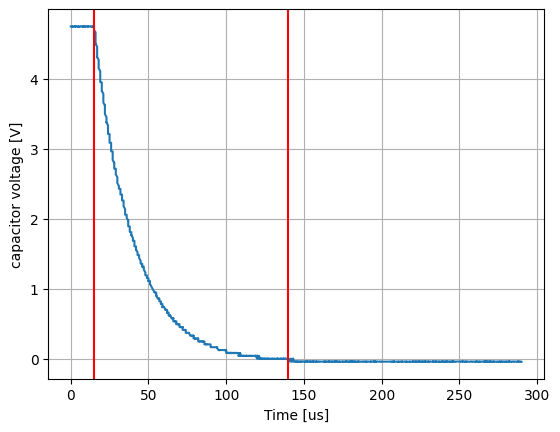

In [113]:
R2 = 1e3 # Ohm
R1 = 37e3 # Ohm


filename = 'r37_dc.csv'
t, Vx, Vy = np.loadtxt(filename, skiprows=1, delimiter=',', unpack=True)
Vc = Vx - Vy
t -= t[0]
plt.plot(t*1e6, Vc)
plt.grid()
plt.xlabel('Time [us]')
plt.ylabel('capacitor voltage [V]')
t1 = 0015e-6
t2 = 0140e-6
mask = (t> t1) & (t < t2)
t = t[mask]
Vc = Vc[mask]
I = Vy[mask] / R2
plt.axvline(t1*1e6, color='r')
plt.axvline(t2*1e6, color='r')



Q Capacitance 590 pF


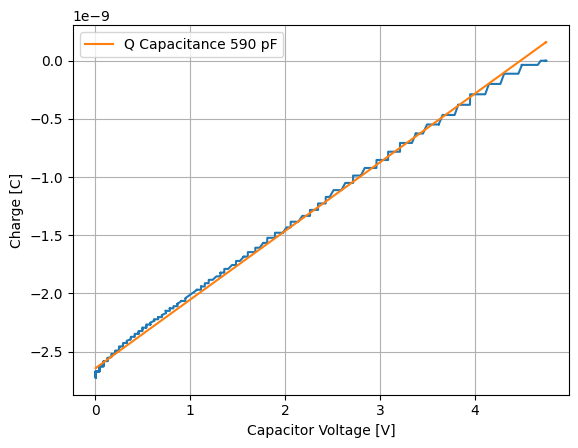

In [114]:
Q = cumulative_trapezoid(I, t, initial=0)
plt.figure()
plt.plot(Vc, Q)
fit = linregress(Vc, Q)
C = fit.slope
print(f'Q Capacitance {C*1e12:.0f} pF')
plt.plot(Vc, fit.slope * Vc + fit.intercept, label=f'Q Capacitance {C*1e12:.0f} pF')
plt.grid()
plt.xlabel('Capacitor Voltage [V]')
plt.ylabel('Charge [C]')
plt.legend()

RC Capacitance 654 pF


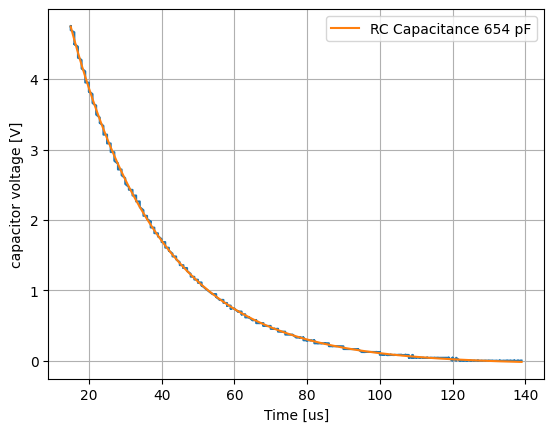

In [115]:
def model(t, amp, tau, offset):
    return amp * np.exp(-t/tau)  + offset
def residual(params, t, data, uncertainty):
    amp = params['amp']
    tau = params['tau']
    offset = params['offset']
    return (data - model(t, amp, tau, offset)) / uncertainty


uncertainty = 0.04 # V
params = Parameters()
params.add('amp', value=5)
params.add('tau', value=(R1+R2)*500e-12)
params.add('offset', value=0)

out = minimize(residual, params, args=(t, Vc, uncertainty))

tau = out.params['tau'].value

C = tau / (R1 + R2)
print(f'RC Capacitance {C*1e12:.0f} pF')
plt.figure()
plt.plot(t*1e6, Vc)
plt.plot(t*1e6, model(t, *out.params.values()), label=f'RC Capacitance {C*1e12:.0f} pF')
plt.grid()
plt.xlabel('Time [us]')
plt.ylabel('capacitor voltage [V]')
plt.legend()

## Charge

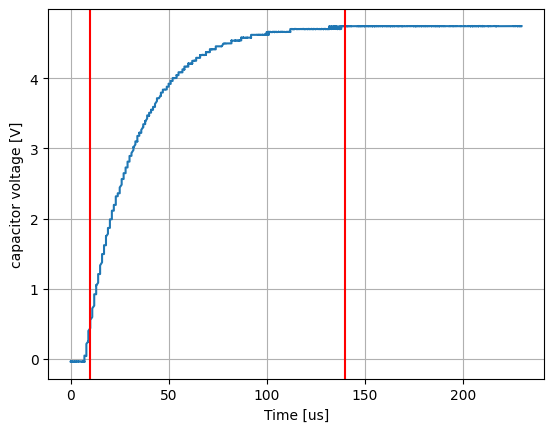

In [118]:
filename = 'r37_с.csv'
t, Vx, Vy = np.loadtxt(filename, skiprows=1, delimiter=',', unpack=True)
Vc = Vx - Vy
t -= t[0]
plt.plot(t*1e6, Vc)
plt.grid()
plt.xlabel('Time [us]')
plt.ylabel('capacitor voltage [V]')
t1 = 10e-6
t2 = 140e-6
mask = (t> t1) & (t < t2)
t = t[mask]
Vc = Vc[mask]
I = Vy[mask] / R2
plt.axvline(t1*1e6, color='r')
plt.axvline(t2*1e6, color='r')



Q Capacitance 529 pF


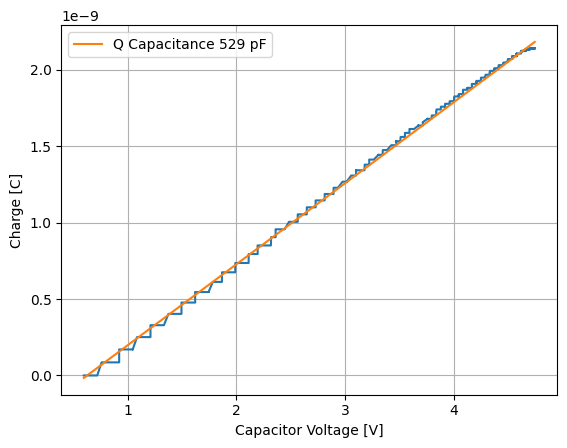

In [119]:
Q = cumulative_trapezoid(I, t, initial=0)
plt.figure()
plt.plot(Vc, Q)
fit = linregress(Vc, Q)
C = fit.slope
print(f'Q Capacitance {C*1e12:.0f} pF')
plt.plot(Vc, fit.slope * Vc + fit.intercept, label=f'Q Capacitance {C*1e12:.0f} pF')
plt.grid()
plt.xlabel('Capacitor Voltage [V]')
plt.ylabel('Charge [C]')
plt.legend()

RC Capacitance 652 pF


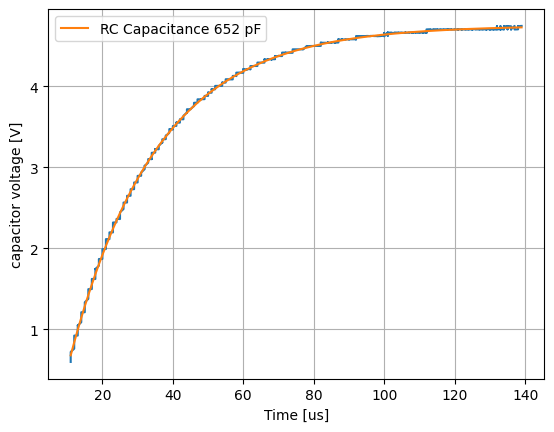

In [120]:
uncertainty = 0.04 # V
params = Parameters()
params.add('amp', value=5)
params.add('tau', value=(R1+R2)*500e-12)
params.add('offset', value=0)

out = minimize(residual, params, args=(t, Vc, uncertainty))

tau = out.params['tau'].value

C = tau / (R1 + R2)
print(f'RC Capacitance {C*1e12:.0f} pF')
plt.figure()
plt.plot(t*1e6, Vc)
plt.plot(t*1e6, model(t, *out.params.values()), label=f'RC Capacitance {C*1e12:.0f} pF')
plt.grid()
plt.xlabel('Time [us]')
plt.ylabel('capacitor voltage [V]')
plt.legend()